<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/Images/SN_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [28]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.4
    Uninstalling yfinance-0.2.4:
      Successfully uninstalled yfinance-0.2.4

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████

In [29]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [30]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [31]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


In [32]:
     #Tesla Stock extraction
!pip install yfinance

import yfinance as yf

In [36]:
tsla = yf.Ticker("TSLA")

# Step 1: Fetch historical data
tesla_data = tsla.history(period="max")

# Step 2: Reset the index of the dataframe
tesla_data.reset_index(inplace=True)

# Step 3: Display the first five rows of the dataframe
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data

In [37]:
!pip install requests

import requests

In [38]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
response = requests.get(url)

In [39]:
# Step1:Save the text of the response as a variable named html_data
html_data = response.text
# Step2:Extract the table using pandas read_html
tables = pd.read_html(html_data)
# Step3:Find the correct table based on the expected content 
tesla_revenue = tables[0]
# Step4:Rename columns to 'Date' and 'Revenue' 
tesla_revenue.columns = ['Date', 'Revenue']

In [40]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [41]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [42]:
print(tesla_revenue.tail())

    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


## Question 3: Use yfinance to Extract Stock Data

In [43]:
#step1
gme = yf.Ticker("GME")

# Step2: Fetch historical data
gme_data = gme.history(period="max")

#Step 3: Reset the index of the dataframe
gme_data.reset_index(inplace=True)

# Step 4: Display the first five rows of the dataframe
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693349  1.603295  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data

In [44]:
# Step 1: Install the requests library
!pip install requests
!pip install html5lib
# Step 2: Import the requests library
import requests

import html5lib


In [45]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html.'
response = requests.get(url)

In [46]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the webpage and save the text of the response as html_data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data = response.text
# Step 2: Parse the html data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')
# Step 3: Extract the table using pandas read_html
tables = pd.read_html(html_data)
# Step 4: Find table 
gme_revenue = tables[1]
# Step 5: Rename columns to 'Date' and 'Revenue' 
gme_revenue.columns = ['Date', 'Revenue']
# Step 6: Remove commas and dollar signs from the Revenue column
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)
# Step 7: Drop any rows with missing values
gme_revenue.dropna(inplace=True)
# Step 8: Filter out any empty strings in the Revenue column
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
# Display the last five rows
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


## Question 5: Plot Tesla Stock Graph

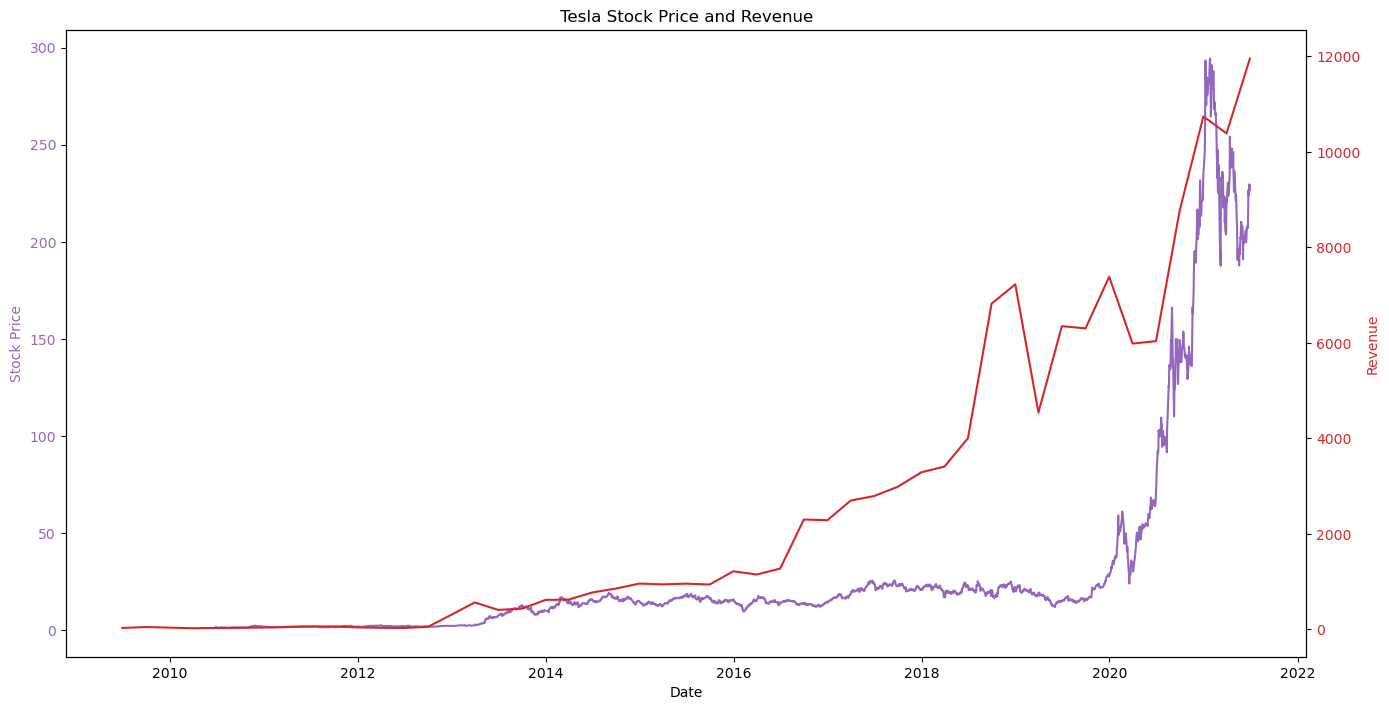

In [53]:
# Step 1: Install necessary libraries
!pip install requests beautifulsoup4 pandas matplotlib

# Step 2: Import the necessary libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Step 3: Download the webpage
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
response = requests.get(url)

# Step 4: Save the text of the response as a variable named html_data
html_data = response.text

# Step 5: Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Step 6: Extract the table using pandas read_html
tables = pd.read_html(html_data)
# Find the correct table based on the expected content (assuming it's the second table)
tesla_revenue = tables[1]

# Step 7: Rename columns to 'Date' and 'Revenue'
tesla_revenue.columns = ['Date', 'Revenue']

# Step 8: Clean the Revenue column by removing any extra characters and converting it to numeric
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)
tesla_revenue.dropna(inplace=True)

# Step 9: Filter out rows where Revenue is empty
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

#tesla_data is fetched and available

# Step 10: Ensure date columns are in datetime format
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Step 11: Filter the data 
tesla_data = tesla_data[tesla_data['Date'] <= '2021-06-30']
tesla_revenue = tesla_revenue[tesla_revenue['Date'] <= '2021-06-30']

# Step 12: Define the make_graph function
def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='tab:purple')
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:purple', label=f'{stock_name} Stock Price')
    ax1.tick_params(axis='y', labelcolor='tab:purple')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Revenue', color='tab:red')
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='tab:red', label=f'{stock_name} Revenue')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    fig.tight_layout()
    plt.title(f'{stock_name} Stock Price and Revenue')
    plt.show()

# Step 13: Call the make_graph function
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph

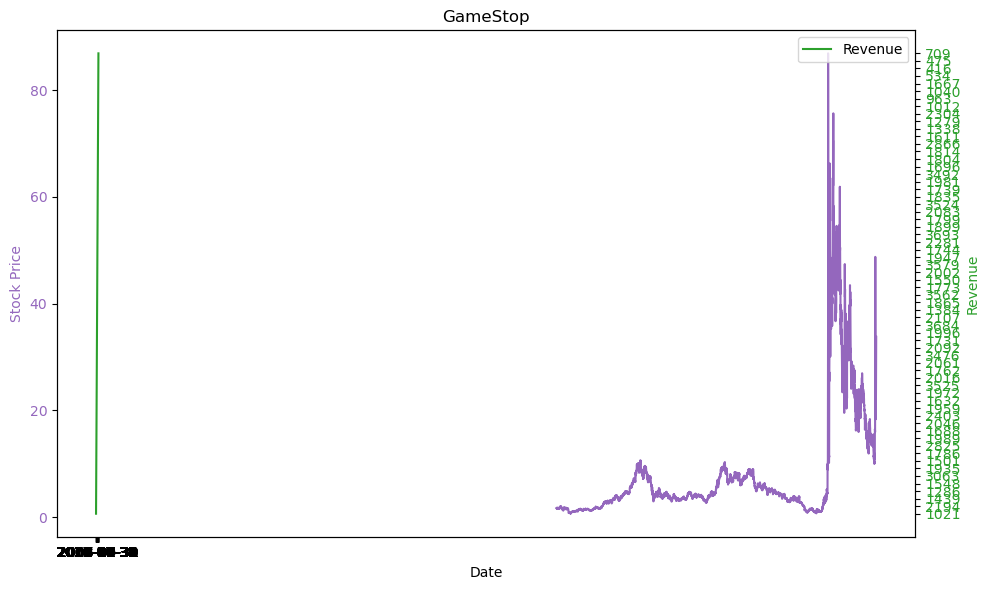

In [55]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot stock data
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:purple', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='tab:purple')
    ax1.tick_params(axis='y', labelcolor='tab:purple')

    # Create a second y-axis to plot the revenue data
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='tab:green', label='Revenue')
    ax2.set_ylabel('Revenue', color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    # Set the title
    plt.title(title)

    # Show the plot
    fig.tight_layout()  # Adjust the layout to prevent overlap
    plt.legend()
    plt.show()

# Call the make_graph function
make_graph(gme_data, gme_revenue, 'GameStop')


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani
